# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
!pip install citipy

Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)'))) - skipping


In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from api_keys import weather_api_key  # Import the OpenWeatherMap API key
from citipy import citipy  # Import citipy to determine the cities based on latitude and longitude

### Generate the Cities List by Using the `citipy` Library

In [5]:


# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the city names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1  # Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Check if the response contains an error
        if city_weather.get('cod') != 200:
            print(f"City not found. Skipping... {city}")
            continue

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    except requests.exceptions.RequestException as e:
        print(f"Request failed: {e}")
        pass

    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | key west
Processing Record 2 of Set 1 | hihifo
City not found. Skipping... hihifo
Processing Record 3 of Set 1 | sisimiut
Processing Record 4 of Set 1 | kulachi
Processing Record 5 of Set 1 | nadym
Processing Record 6 of Set 1 | saidpur
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | olonkinbyen
Processing Record 9 of Set 1 | francisco sa
Processing Record 10 of Set 1 | korocha
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | aral
Processing Record 14 of Set 1 | bengkulu
Processing Record 15 of Set 1 | wailua homesteads
Processing Record 16 of Set 1 | constantia
Processing Record 17 of Set 1 | aitape
Processing Record 18 of Set 1 | maintirano
Processing Record 19 of Set 1 | nowshahr
Processing Record 20 of Set 1 | bilibino
Processing Record 21 of Set 1 | tolanaro
Processing Record 22 of Set 1 | manta
Processing R

In [7]:
# Convert the city_data list to a DataFrame
weather_data = pd.DataFrame(city_data)
weather_data.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,key west,24.5557,-81.7826,26.67,87,100,1.34,US,1728997217
1,sisimiut,66.9395,-53.6735,-1.29,75,98,1.83,GL,1728997470
2,kulachi,31.9286,70.4592,32.75,14,0,1.73,PK,1728997471
3,nadym,65.5333,72.5167,0.51,92,100,2.05,RU,1728997406
4,saidpur,25.7777,88.8917,25.35,76,28,1.76,BD,1728997473


In [8]:
# Export the City_Data into a csv
weather_data.to_csv("output_data/cities.csv", index_label="City_ID")


In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,key west,24.5557,-81.7826,26.67,87,100,1.34,US,1728997217
1,sisimiut,66.9395,-53.6735,-1.29,75,98,1.83,GL,1728997470
2,kulachi,31.9286,70.4592,32.75,14,0,1.73,PK,1728997471
3,nadym,65.5333,72.5167,0.51,92,100,2.05,RU,1728997406
4,saidpur,25.7777,88.8917,25.35,76,28,1.76,BD,1728997473


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

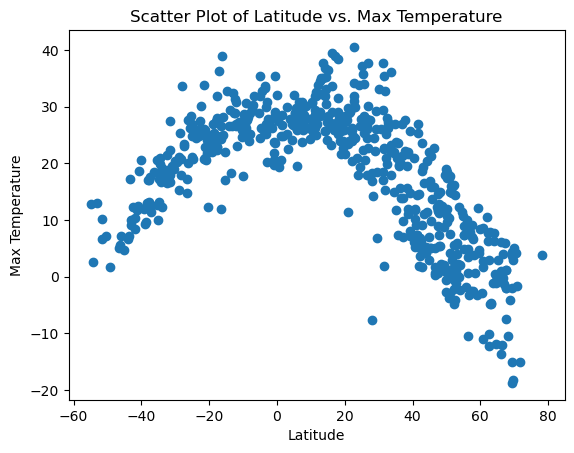

<Figure size 640x480 with 0 Axes>

In [10]:
# Build scatter plot for latitude vs. temperature
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Create scatter plot
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Scatter Plot of Latitude vs. Max Temperature')

# Show the plot
plt.show()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

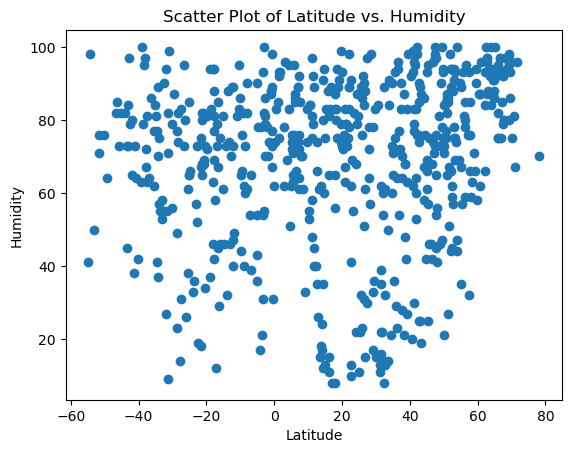

<Figure size 640x480 with 0 Axes>

In [16]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Create scatter plot
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Scatter Plot of Latitude vs. Humidity')

# Show the plot
plt.show()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

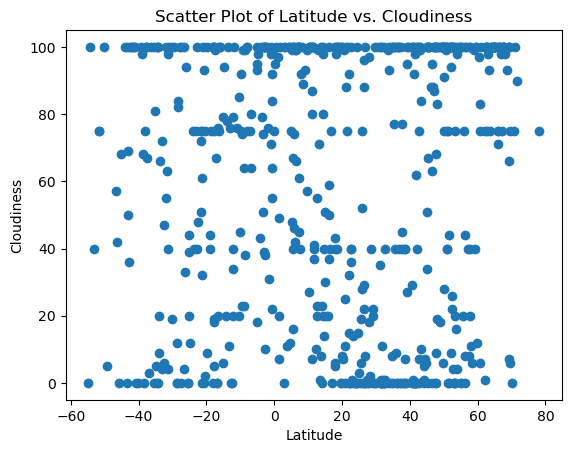

<Figure size 640x480 with 0 Axes>

In [17]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Create scatter plot
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Scatter Plot of Latitude vs. Cloudiness')

# Show the plot
plt.show()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

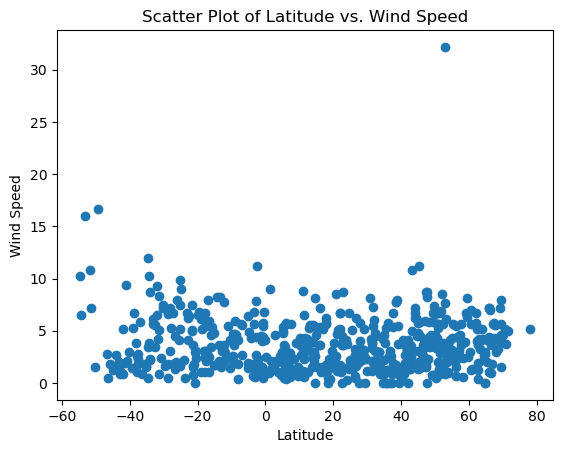

<Figure size 640x480 with 0 Axes>

In [18]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Create scatter plot
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Scatter Plot of Latitude vs. Wind Speed')

# Show the plot
plt.show()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


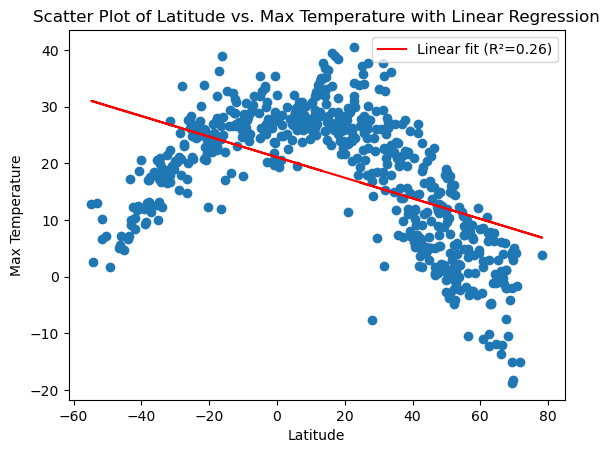

In [22]:
# Define a function to create Linear Regression plots
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Scatter plot
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])
# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(city_data_df['Lat'], city_data_df['Max Temp'])
line = slope * city_data_df['Lat'] + intercept
plt.plot(city_data_df['Lat'], line, color='red', label=f'Linear fit (R²={r_value**2:.2f})')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Scatter Plot of Latitude vs. Max Temperature with Linear Regression')

# Show and save the plot
plt.legend()
plt.savefig("output_data/LinReg.png")
plt.show()

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Filter data for Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,key west,24.5557,-81.7826,26.67,87,100,1.34,US,1728997217
1,sisimiut,66.9395,-53.6735,-1.29,75,98,1.83,GL,1728997470
2,kulachi,31.9286,70.4592,32.75,14,0,1.73,PK,1728997471
3,nadym,65.5333,72.5167,0.51,92,100,2.05,RU,1728997406
4,saidpur,25.7777,88.8917,25.35,76,28,1.76,BD,1728997473


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Filter data for Northern Hemisphere
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
7,francisco sa,-16.4758,-43.4883,26.68,45,100,5.42,BR,1728997476
9,puerto natales,-51.7236,-72.4875,10.25,71,75,10.80,CL,1728997254
12,bengkulu,-3.8004,102.2655,25.78,78,100,1.69,ID,1728997482
15,aitape,-3.1374,142.3475,26.97,82,100,1.72,PG,1728997486
16,maintirano,-18.0667,44.0167,27.45,63,0,6.07,MG,1728997487


###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Scatter plot
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])
# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(city_data_df['Lat'], city_data_df['Max Temp'])
line = slope * city_data_df['Lat'] + intercept
plt.plot(city_data_df['Lat'], line, color='red', label=f'Linear fit (R²={r_value**2:.2f})')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Scatter Plot of Latitude vs. Max Temperature with Linear Regression')

# Show and save the plot
plt.legend()
plt.savefig("output_data/LinReg.png")
plt.show()

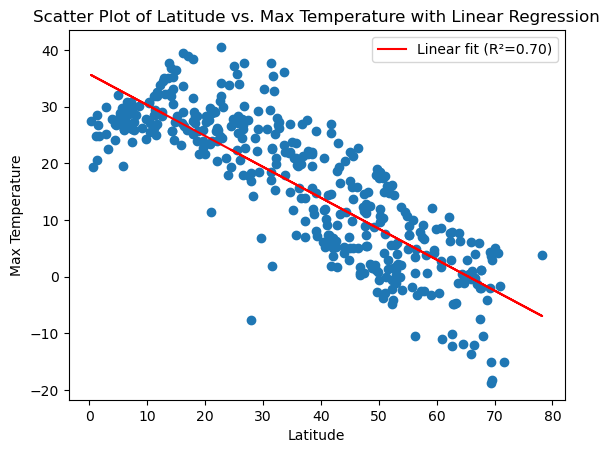

In [25]:
# Linear regression on Southern Hemisphere
# Scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
line = slope * northern_hemi_df['Lat'] + intercept
plt.plot(northern_hemi_df['Lat'], line, color='red', label=f'Linear fit (R²={r_value**2:.2f})')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Scatter Plot of Latitude vs. Max Temperature with Linear Regression')

# Show and save the plot
plt.legend()
plt.savefig("output_data/LinReg_NorthernHemisphere.png")
plt.show()

**Discussion about the linear relationship:** There is a clear strong correlation on the northern hemishpere where latitude goes up the temperature drops. which makes sense.

### Humidity vs. Latitude Linear Regression Plot

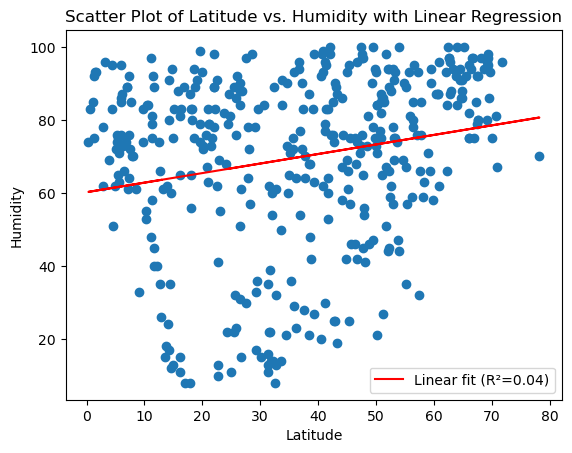

In [26]:
# Northern Hemisphere
# Scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
line = slope * northern_hemi_df['Lat'] + intercept
plt.plot(northern_hemi_df['Lat'], line, color='red', label=f'Linear fit (R²={r_value**2:.2f})')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Scatter Plot of Latitude vs. Humidity with Linear Regression')

# Show and save the plot
plt.legend()
plt.savefig("output_data/LinReg_NorthernHumidity.png")
plt.show()

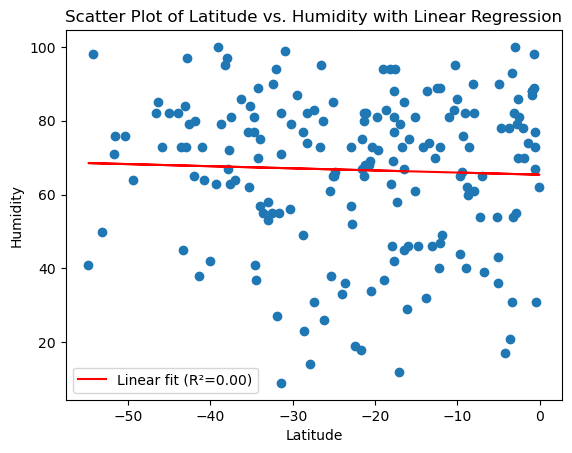

In [28]:
# Southern Hemisphere
# Scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
line = slope * southern_hemi_df['Lat'] + intercept
plt.plot(southern_hemi_df['Lat'], line, color='red', label=f'Linear fit (R²={r_value**2:.2f})')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Scatter Plot of Latitude vs. Humidity with Linear Regression')

# Show and save the plot
plt.legend()
plt.savefig("output_data/LinReg_SouthernHumidity.png")
plt.show()

**Discussion about the linear relationship:** HUmidity has no relevant relationship with the latudude. R values are negligable. in other words no relationship

### Cloudiness vs. Latitude Linear Regression Plot

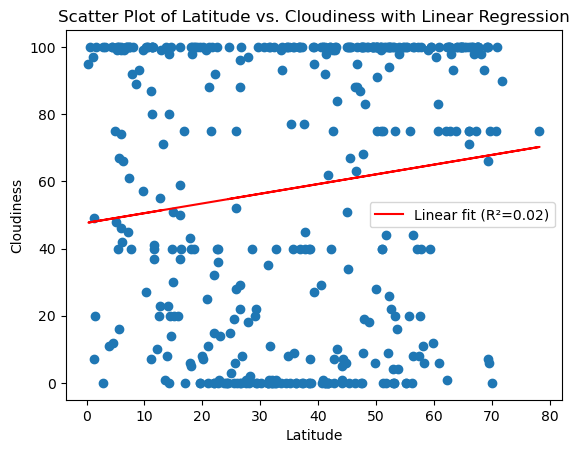

In [29]:
# Northern Hemisphere
# # Scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
line = slope * northern_hemi_df['Lat'] + intercept
plt.plot(northern_hemi_df['Lat'], line, color='red', label=f'Linear fit (R²={r_value**2:.2f})')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Scatter Plot of Latitude vs. Cloudiness with Linear Regression')

# Show and save the plot
plt.legend()
plt.savefig("output_data/LinReg_NorthernCloudiness.png")
plt.show()

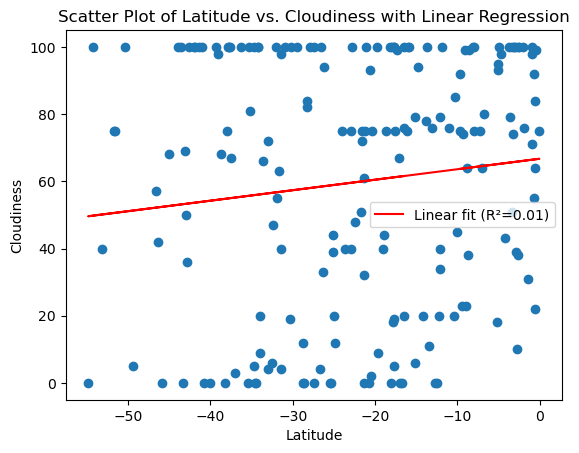

In [30]:
# Southern Hemisphere
# # Scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
line = slope * southern_hemi_df['Lat'] + intercept
plt.plot(southern_hemi_df['Lat'], line, color='red', label=f'Linear fit (R²={r_value**2:.2f})')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Scatter Plot of Latitude vs. Cloudiness with Linear Regression')

# Show and save the plot
plt.legend()
plt.savefig("output_data/LinReg_SouthernCloudiness.png")
plt.show()

**Discussion about the linear relationship:** cloudiness is also not relevant to northern or southern hemisphere latitude. Ging north or south are not relevant to more or less cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

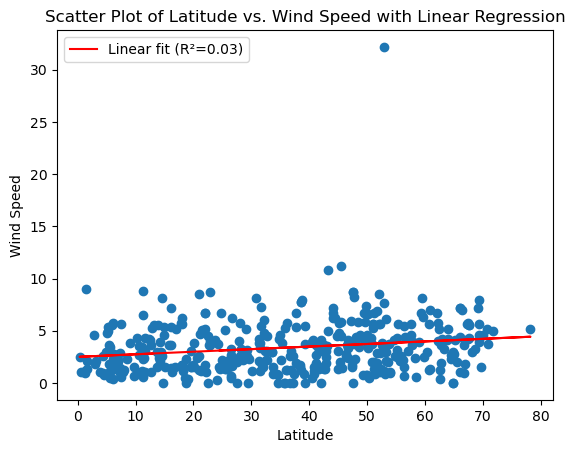

In [31]:
# Northern Hemisphere
# # Scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
line = slope * northern_hemi_df['Lat'] + intercept
plt.plot(northern_hemi_df['Lat'], line, color='red', label=f'Linear fit (R²={r_value**2:.2f})')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Scatter Plot of Latitude vs. Wind Speed with Linear Regression')

# Show and save the plot
plt.legend()
plt.savefig("output_data/LinReg_NorthernWind Speed.png")
plt.show()

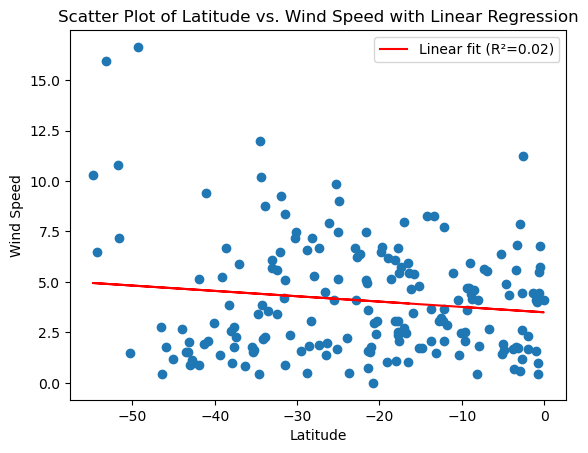

In [32]:
# Southern Hemisphere
# # Scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
line = slope * southern_hemi_df['Lat'] + intercept
plt.plot(southern_hemi_df['Lat'], line, color='red', label=f'Linear fit (R²={r_value**2:.2f})')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Scatter Plot of Latitude vs. Wind Speed with Linear Regression')

# Show and save the plot
plt.legend()
plt.savefig("output_data/LinReg_SouthernWind Speed.png")
plt.show()

**Discussion about the linear relationship:** wind speed also doesn't have much of a relationship with latitude wheather ou are on the northern or southern hemispheres.